In [8]:
from sympy import symbols, diff, Eq, solve, simplify, init_printing


# Initialize pretty printing
init_printing(use_unicode=True)

# Define symbols (variables)
L, K, alpha, beta, r, w, q, l_m = symbols('L K alpha beta r w q l_m')

# Define the production function
f = (L**beta)*(K**alpha)

#define the Lagrangian
La = -r*K-w*L+ l_m*(f-q)
display(L)

# First order conditions
foc_K = diff(La, K)
foc_L = diff(La, L)
foc_l_m = diff(La, l_m)

display("FOC for K:", foc_K)
display("FOC for L:", foc_L)
display("FOC for lambda:", foc_l_m)



# Solve the system foc_K = 0, foc_L = 0, foc_l_m = 0
solutions = solve([Eq(foc_K, 0), Eq(foc_L, 0), Eq(foc_l_m, 0)], (K, L, l_m))

# Output the solutions for x, y, and lambda
display("Solutions:", solutions)

# Optional: simplified versions of the solutions
K_o = simplify(solutions[0][0])
L_o= simplify(solutions[0][1])
lm = simplify(solutions[0][2])

display("Simplified x:", K_o)
display("Simplified y:", L_o)
display("Simplified h:", lm)



'FOC for K:'

'FOC for L:'

'FOC for lambda:'

'Solutions:'

'Simplified x:'

'Simplified y:'

'Simplified h:'

In [47]:
from sympy import Matrix, det

# Bordered Hessian matrix construction

# Second derivatives (Hessian of L)
d2L_dK2 = simplify(diff(foc_K, K))
d2L_dL2 = simplify(diff(foc_L, L))
d2L_dKdL = simplify(diff(foc_L, K))

dg_dK = simplify(diff(foc_l_m, K))
dg_dL = simplify(diff(foc_l_m, L))


Hessian_L = Matrix([
    [0, dg_dK, dg_dL],  # First row: derivatives of the constraint
    [dg_dK, d2L_dK2, d2L_dKdL],  # Second row: derivatives with respect to x
    [dg_dL, d2L_dKdL, d2L_dL2]   # Third row: derivatives with respect to y
])

# Simplify the Hessian matrix
simplified_Hessian = simplify(Hessian_L)

display(simplified_Hessian)

# Evaluate the Hessian matrix at the optimal point

evaluated_Hessian = simplified_Hessian.subs({K: K_o, L: L_o, l_m: lm})

display(evaluated_Hessian)


parametros_constant = {r: 0.1, w: 2, alpha: 0.7, beta: 0.6, q: 10}

evaluated_H = evaluated_Hessian.subs(parametros_constant)

display(evaluated_H)
print(det(evaluated_H))

⎡                   α - 1  β                α  β - 1        ⎤
⎢     0            K     ⋅L ⋅α             K ⋅L     ⋅β      ⎥
⎢                                                           ⎥
⎢ α - 1  β     α - 2  β                 α - 1  β - 1        ⎥
⎢K     ⋅L ⋅α  K     ⋅L ⋅α⋅lₘ⋅(α - 1)   K     ⋅L     ⋅α⋅β⋅lₘ ⎥
⎢                                                           ⎥
⎢ α  β - 1      α - 1  β - 1           α  β - 2             ⎥
⎣K ⋅L     ⋅β   K     ⋅L     ⋅α⋅β⋅lₘ   K ⋅L     ⋅β⋅lₘ⋅(β - 1)⎦

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                             0                                                ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

⎡        0           0.278287288902361     5.56574577804722 ⎤
⎢                                                           ⎥
⎢0.278287288902361  -0.00119265980958155  0.0556574577804722⎥
⎢                                                           ⎥
⎣5.56574577804722    0.0556574577804722   -0.742099437072963⎦

0.266829696892812


' costo total de producir q unidades: '

' costo marginal de producir q unidades: '

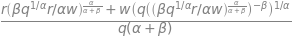

In [9]:
# calculamos costos totales, costos marginales y produccion óptima

# Define symbols (variables)
CT_q, CMg_q = symbols('CT_q CMg_q')

CT_q= w*K_o+r*L_o

display(" costo total de producir q unidades: ",simplify(CT_q))

CMg_q=diff(CT_q,q)

display(" costo marginal de producir q unidades: ",simplify(CMg_q))

'foc maximizacion gnancia:'

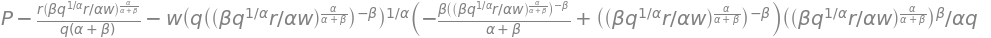

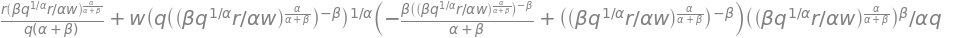

In [15]:
# resolvemos el problema de maximización del productor

# Define symbols (variables)
P = symbols('P')

PM = P*q-CT_q

#FOC maximización ganancia

foc_q = diff(PM, q)

display("foc maximizacion gnancia:", foc_q )
display(CMg_q)

# solve for q: not possible
# solution_q = solve(Eq(foc_q, 0), (q))



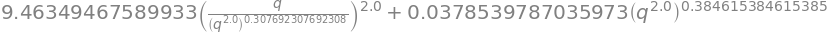

<lambdifygenerated-38>:2: RuntimeWarning: divide by zero encountered in power
  return 9.46349467589933*(q*(q**2.0)**(-0.307692307692308))**2.0 + 0.0378539787035973*(q**2.0)**0.384615384615385
<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in multiply
  return 9.46349467589933*(q*(q**2.0)**(-0.307692307692308))**2.0 + 0.0378539787035973*(q**2.0)**0.384615384615385


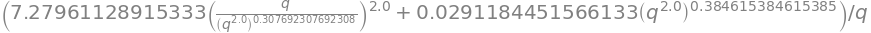

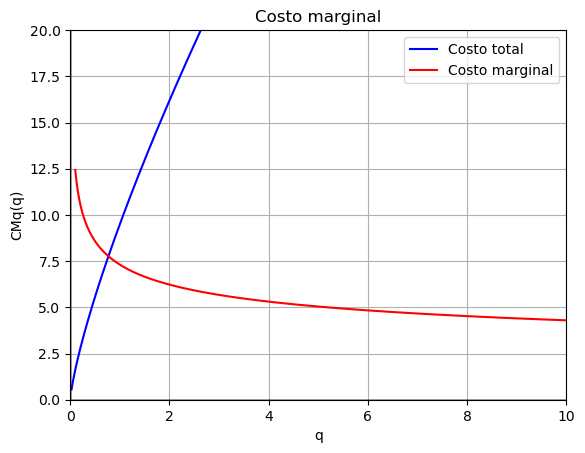

In [76]:


import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

# solución numérica de q óptimo


# # evaluar costo total  en valores específicos de los parámetros

parametros = {r: 0.1, w: 2, alpha: 0.5, beta: 0.8}

evaluated_CT = CT_q.subs(parametros)

display(simplify(evaluated_CT))


# Convert the symbolic expression to a numerical function
CT_lambdified = lambdify(q, evaluated_CT)

# Generate q values for the plot
q_values = np.linspace(0, 10, 400)

# Evaluate the function for each value of q
CT_values = CT_lambdified(q_values)

# Plotting using matplotlib
plt.plot(q_values, CT_values, label='Costo total', color='blue')

# Draw axes at (0, 0)
plt.axhline(0, color='black', lw=1)  # Horizontal axis (y = 0)
plt.axvline(0, color='black', lw=1)  # Vertical axis (x = 0)

# Set limits for the axes to ensure the crossing is visible at (0,0)
plt.xlim(0, 10)
plt.ylim(0, 20)

# Set labels and title
plt.title('Costo total')
plt.xlabel('q')
plt.ylabel('CT(q)')

# Add a grid and legend
plt.grid(True)
plt.legend()



# # evaluar costo total y costo marginal en valores específicos de los parámetros


evaluated_CMg = CMg_q.subs(parametros)

display(simplify(evaluated_CMg))


# Convert the symbolic expression to a numerical function
CMg_lambdified = lambdify(q, evaluated_CMg)

# Generate q values for the plot
q_values = np.linspace(0.1, 10, 400)

# Evaluate the function for each value of q
CMg_values = CMg_lambdified(q_values)

# Plotting using matplotlib
plt.plot(q_values, CMg_values, label='Costo marginal', color='red')

# Draw axes at (0, 0)
plt.axhline(0, color='black', lw=1)  # Horizontal axis (y = 0)
plt.axvline(0, color='black', lw=1)  # Vertical axis (x = 0)

# Set limits for the axes to ensure the crossing is visible at (0,0)
plt.xlim(0, 10)
plt.ylim(0, 20)

# Set labels and title
plt.title('Costo marginal')
plt.xlabel('q')
plt.ylabel('CMq(q)')

# Add a grid and legend
plt.grid(True)
plt.legend()




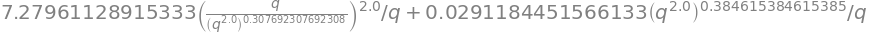

Numerical Solution using fsolve: 5.1813734168141545
0.222691178771596


In [77]:


# obtener q "optimo" para rendimientos de escala crecientes

import numpy as np
from sympy import symbols, lambdify
from scipy.optimize import fsolve


display(evaluated_CMg)

evaluated_CMg_numeric = lambdify(q, evaluated_CMg, "numpy")

# Define the function to solve, using the numeric version of evaluated_CMg
def func(q_val):
    return -evaluated_CMg_numeric(q_val)+5

# Initial guess for the solver
initial_guess = 1

# Use fsolve to solve the function numerically
solu = fsolve(func, initial_guess)

print("Numerical Solution using fsolve:", solu[0])

segunda_derivada= diff(-evaluated_CMg,q)

print(segunda_derivada.subs({q: float(solu[0])}))
